In [1]:
#pip install beautifulsoup4

In [2]:
#pip install requests

In [3]:
import requests
from bs4 import BeautifulSoup
import csv
import time

#def scrape_amazon_Electronics_reviews():
    url = "https://www.amazon.com/s?k=Electronics"  
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    
    response = requests.get(url, headers=headers)
    
    #if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        product_links = []
        
        #for product in soup.find_all("div", class_="sg-col-inner"):
            link = product.find("a", class_="a-link-normal")
            #if link:
                product_links.append("https://www.amazon.com" + link['href'])
        
        #with open("Electronics_reviews.csv", "w", newline="", encoding="utf-8") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["Rating", "Comment"])
            
            #for link in product_links:
                response = requests.get(link, headers=headers)
                #if response.status_code == 200:
                    soup = BeautifulSoup(response.content, "html.parser")
                    product_title = soup.find("span", class_="a-size-large product-title-word-break").text.strip()
                    
                    review_section = soup.find("div", {"data-hook": "reviews-collapsed"})
                    #if review_section:
                        reviews = review_section.find_all("span", {"data-hook": "review-body"})
                        #for review in reviews:
                            rating = review.find_previous("i").text.strip()  
                            comment = review.text.strip()  # Get the comment text
                            writer.writerow([rating, comment])
                            
                            # Introduce a delay to avoid overwhelming the server
                            time.sleep(2)  
                #else:
                    print(f"Failed to scrape {link}. Status code: {response.status_code}")
                    # Retry the request after waiting for a while
                    time.sleep(10)  
    #else:
        print(f"Failed to access the URL. Status code: {response.status_code}")


#if __name__ == "__main__":
    scrape_amazon_Electronics()

IndentationError: unexpected indent (3872864214.py, line 7)

The aboce code can be used to scrap data, but amazon and almost all platforms have restricted it, so i got in touch with stanford where they had amazon electronics dataset and they mailed it to me 

### Reading Json File

In [ ]:
#import json
#import os


file_path = os.path.expanduser("~/Desktop/Final Project/Electronics.json")

#def stream_json_data(file_path):
    #with open(file_path, "r") as json_file:
        #for line_number, line in enumerate(json_file, start=1):
            #try:
                data = json.loads(line)
                #yield data
            #except json.JSONDecodeError:
                print(f"Error parsing line {line_number}: {line}")

#for index, item in enumerate(stream_json_data(file_path), start=1):
    print(f"Row {index}: {item}")
    #if index == 20:
        #break

### Converting it into Excel File

In [ ]:
#import os
#import json
#import pandas as pd
#from itertools import islice

file_path = os.path.expanduser("~/Desktop/Final Project/Electronics.json")

chunk_size = 1000

json_directory = os.path.dirname(file_path)

output_file_path = os.path.join(json_directory, "Electronics.xlsx")

excel_writer = pd.ExcelWriter(output_file_path, engine="xlsxwriter")

row_counter = 0

#with open(file_path, "r") as json_file:
    #while True:
        data_chunk = list(islice(json_file, chunk_size))
        #if not data_chunk:
            #break

        df_chunk = pd.DataFrame([json.loads(line) for line in data_chunk])

        df_chunk.to_excel(excel_writer, sheet_name="Sheet1", index=False, startrow=row_counter)

        row_counter += len(df_chunk)

excel_writer.save()

#print("Data saved to Excel file:", output_file_path)

In [4]:
import pandas as pd
import os

file_path = "/home/xjoex/Desktop/Electronics.xlsx"

df = pd.read_excel(file_path)

print(df.head())

  overall verified   reviewTime      reviewerID        asin  \
0       5     True  07 17, 2002  A1N070NS9CJQ2I  0060009810   
1       5    False   07 6, 2002  A3P0KRKOBQK1KN  0060009810   
2       5    False   07 3, 2002  A192HO2ICJ75VU  0060009810   
3       4    False  06 30, 2002  A2T278FKFL3BLT  0060009810   
4       5    False  06 28, 2002  A2ZUXVTW8RXBXW  0060009810   

                       style reviewerName  \
0  {'Format:': ' Hardcover'}   Teri Adams   
1  {'Format:': ' Hardcover'}     Willa C.   
2  {'Format:': ' Hardcover'}          Kit   
3  {'Format:': ' Hardcover'}       Andres   
4  {'Format:': ' Hardcover'}         John   

                                          reviewText  \
0  This was the first time I read Garcia-Aguilera...   
1  As with all of Ms. Garcia-Aguilera's books, I ...   
2  I've not read any of Ms Aguilera's works befor...   
3  This romance novel is right up there with the ...   
4  Carolina Garcia Aguilera has done it again.  S...   

             

In [12]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1048575, 9)


In [13]:
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1035845 non-null  object
 1   verified        887548 non-null   object
 2   reviewTime      1042266 non-null  object
 3   reviewerID      1048575 non-null  object
 4   asin            1047571 non-null  object
 5   style           902959 non-null   object
 6   reviewText      1046804 non-null  object
 7   summary         1048484 non-null  object
 8   unixReviewTime  799614 non-null   object
dtypes: object(9)
memory usage: 72.0+ MB
None


In [14]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        overall verified reviewTime reviewerID        asin  \
count   1035845   887548    1042266    1048575     1047571   
unique    39424      977      39728     638976      267167   
top           5     True       True       True  B000BQ7GW8   
freq     598079   596838     161443      42032       13755   

                                           style  reviewText     summary  \
count                                     902959     1046804     1048484   
unique                                    228626      836949      447538   
top     {'Package Type:': ' Standard Packaging'}  Five Stars  Five Stars   
freq                                       33969       38232       79448   

       unixReviewTime  
count          799614  
unique          72620  
top                 2  
freq            16755  


In [15]:
df.head(15)

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime
0,5,True,"07 17, 2002",A1N070NS9CJQ2I,0060009810,{'Format:': ' Hardcover'},This was the first time I read Garcia-Aguilera...,Hit The Spot!,1026864000
1,5,False,"07 6, 2002",A3P0KRKOBQK1KN,0060009810,{'Format:': ' Hardcover'},"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,1025913600
2,5,False,"07 3, 2002",A192HO2ICJ75VU,0060009810,{'Format:': ' Hardcover'},I've not read any of Ms Aguilera's works befor...,One Hot Summer,1025654400
3,4,False,"06 30, 2002",A2T278FKFL3BLT,0060009810,{'Format:': ' Hardcover'},This romance novel is right up there with the ...,I love this book!,1025395200
4,5,False,"06 28, 2002",A2ZUXVTW8RXBXW,0060009810,{'Format:': ' Hardcover'},Carolina Garcia Aguilera has done it again. S...,One Hot Book,1025222400
5,4,False,"06 25, 2002",A21JDG4HA6OLPF,0060009810,{'Format:': ' Hardcover'},"Not only can she write mysteries,but she sure ...",Carolina does it again!,1024963200
6,5,False,"06 22, 2002",A2NCADLQY962YD,0060009810,{'Format:': ' Hardcover'},Once again Garcia-Aguilera has written a book ...,"It's no mystery, Garcia-Aguilera can do romance",1024704000
7,5,False,"01 26, 2006",A2UNA438B0FRA8,0060786817,{'Format:': ' Hardcover'},The timing is just right for a good book. Actu...,A breath of fresh air for reading,1138233600
8,5,False,"01 21, 2006",A2NQQSHSQKKGEX,0060786817,{'Format:': ' Hardcover'},Engaging. Dark. Reading the book you could alm...,Well written page turner with fully develped c...,1137801600
9,3,False,"01 18, 2006",A5EXND10WD4PM,0060786817,{'Format:': ' Hardcover'},Set amid the backdrop of New York City's imper...,The Title Tells The Story!,1137542400


In [16]:
df = df.drop(columns=['reviewerName', 'vote', 'image'])

KeyError: "['reviewerName', 'vote', 'image'] not found in axis"

In [ ]:
df.head(10)

In [ ]:
df_review_text = df[['reviewText']]

In [ ]:
print(df_review_text.head(15))

In [ ]:
pd.set_option('display.max_colwidth', None)
print(df_review_text.head(5))

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
df_review_text = df_review_text.dropna(subset=['reviewText'])

In [ ]:
df_review_text['reviewText'] = df_review_text['reviewText'].astype(str) #covert to string

In [ ]:
df_review_text = df_review_text.applymap(str)

In [ ]:
# Convert text to lowercase
df_review_text['cleaned_review'] = df_review_text['reviewText'].str.lower()

In [ ]:
# Remove punctuation and special characters
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].str.replace('[{}]'.format(string.punctuation), '')

In [ ]:
# Remove numbers
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].str.replace(r'\d+', '')

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

In [17]:
df_review_text.head(10)

,reviewText,cleaned_review
0,This was the first time I read Garcia-Aguilera...,this was the first time i read garcia-aguilera...
1,"As with all of Ms. Garcia-Aguilera's books, I ...","as with all of ms. garcia-aguilera's books, i ..."
2,I've not read any of Ms Aguilera's works befor...,i've not read any of ms aguilera's works befor...
3,This romance novel is right up there with the ...,this romance novel is right up there with the ...
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera has done it again. s...
5,"Not only can she write mysteries,but she sure ...","not only can she write mysteries,but she sure ..."
6,Once again Garcia-Aguilera has written a book ...,once again garcia-aguilera has written a book ...
7,The timing is just right for a good book. Actu...,the timing is just right for a good book. actu...
8,Engaging. Dark. Reading the book you could alm...,engaging. dark. reading the book you could alm...
9,Set amid the backdrop of New York City's imper...,set amid the backdrop of new york city's imper...


## Sentiment Analysis 

In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/xjoex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [22]:
df_review_text['sentiment_score'] = df_review_text['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_review_text['sentiment'] = df_review_text['sentiment_score'].apply(get_sentiment)

In [23]:
df_review_text.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment
0,This was the first time I read Garcia-Aguilera...,this was the first time i read garcia-aguilera...,0.9670,Positive
1,"As with all of Ms. Garcia-Aguilera's books, I ...","as with all of ms. garcia-aguilera's books, i ...",0.8883,Positive
2,I've not read any of Ms Aguilera's works befor...,i've not read any of ms aguilera's works befor...,0.2579,Positive
3,This romance novel is right up there with the ...,this romance novel is right up there with the ...,0.9882,Positive
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera has done it again. s...,0.4927,Positive
5,"Not only can she write mysteries,but she sure ...","not only can she write mysteries,but she sure ...",0.8257,Positive
6,Once again Garcia-Aguilera has written a book ...,once again garcia-aguilera has written a book ...,0.9718,Positive
7,The timing is just right for a good book. Actu...,the timing is just right for a good book. actu...,0.8452,Positive
8,Engaging. Dark. Reading the book you could alm...,engaging. dark. reading the book you could alm...,0.7124,Positive
9,Set amid the backdrop of New York City's imper...,set amid the backdrop of new york city's imper...,0.9774,Positive


## Classification

In [24]:
general_keywords = ['review', 'read', 'book', 'enjoyed', 'written']
care_keywords = ['complaint', 'problem', 'issue', 'unhappy', 'disappointed']
leads_keywords = ['buy', 'purchase', 'product', 'service', 'interested']

In [25]:
def categorize_message(text):
    text = text.lower()
    for keyword in care_keywords:
        if keyword in text:
            return "Care"
    for keyword in leads_keywords:
        if keyword in text:
            return "Leads"
    return "General"

In [26]:
df_review_text['category'] = df_review_text['cleaned_review'].apply(categorize_message)

In [27]:
print(df_review_text[['cleaned_review', 'sentiment', 'category']])

                                            cleaned_review sentiment category
0        this was the first time i read garcia-aguilera...  Positive  General
1        as with all of ms. garcia-aguilera's books, i ...  Positive  General
2        i've not read any of ms aguilera's works befor...  Positive  General
3        this romance novel is right up there with the ...  Positive  General
4        carolina garcia aguilera has done it again.  s...  Positive  General
...                                                    ...       ...      ...
1048570    77mm hi-resolution 3pcs lens filter kit - black   Neutral  General
1048571              low cost filter kit that does the job  Negative  General
1048572                                  filer kit to have   Neutral  General
1048573                            best bang for your buck  Positive  General
1048574                                great for exercise!  Positive  General

[1046804 rows x 3 columns]


## Display

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
pd.set_option('display.max_colwidth', 50)

In [30]:
print(df_review_text[['cleaned_review', 'sentiment', 'category']])

                                            cleaned_review sentiment category
0        this was the first time i read garcia-aguilera...  Positive  General
1        as with all of ms. garcia-aguilera's books, i ...  Positive  General
2        i've not read any of ms aguilera's works befor...  Positive  General
3        this romance novel is right up there with the ...  Positive  General
4        carolina garcia aguilera has done it again.  s...  Positive  General
...                                                    ...       ...      ...
1048570    77mm hi-resolution 3pcs lens filter kit - black   Neutral  General
1048571              low cost filter kit that does the job  Negative  General
1048572                                  filer kit to have   Neutral  General
1048573                            best bang for your buck  Positive  General
1048574                                great for exercise!  Positive  General

[1046804 rows x 3 columns]


In [31]:
category_counts = df_review_text['category'].value_counts()
print(category_counts)

General    782633
Leads      168344
Care        95827
Name: category, dtype: int64


In [32]:
total_messages = df_review_text.shape[0]
print("Total number of messages:", total_messages)

Total number of messages: 1046804


#### EDA

In [33]:
import matplotlib.pyplot as plt

In [34]:
sentiment_counts = df_review_text['sentiment'].value_counts()

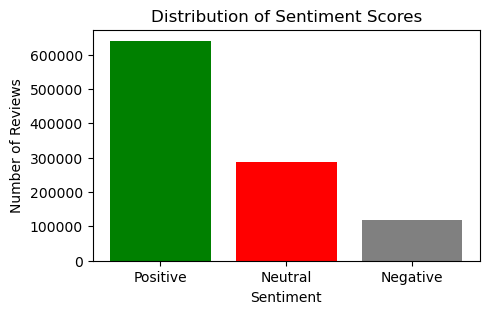

In [36]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(5, 3))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [37]:
from wordcloud import WordCloud

In [38]:
positive_reviews = df_review_text[df_review_text['sentiment'] == 'Positive']
negative_reviews = df_review_text[df_review_text['sentiment'] == 'Negative']
neutral_reviews = df_review_text[df_review_text['sentiment'] == 'Neutral']

In [39]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
generate_word_cloud(' '.join(positive_reviews['cleaned_review']), 'Positive Sentiment Word Cloud')
generate_word_cloud(' '.join(negative_reviews['cleaned_review']), 'Negative Sentiment Word Cloud')
generate_word_cloud(' '.join(neutral_reviews['cleaned_review']), 'Neutral Sentiment Word Cloud')

#### Neural Network 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

2023-08-07 10:29:10.640531: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 10:29:13.451571: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 10:29:13.464321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 10:29:22.784140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [38]:
X = df_review_text['cleaned_review']
y_sentiment = df_review_text['sentiment']

In [39]:
y_sentiment_binary = (y_sentiment == 'Positive').astype(int)

In [40]:
X_train, X_test, y_train_sentiment, y_test_sentiment = train_test_split(
    X, y_sentiment_binary, test_size=0.2, random_state=42
)

In [41]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [42]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [43]:
max_sequence_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [44]:
# Build the neural network model
embedding_dim = 100

In [45]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification for sentiment

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Train the model
batch_size = 32
epochs = 2

model.fit(X_train_padded, y_train_sentiment, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2023-08-07 10:30:14.326747: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 602958400 exceeds 10% of free system memory.


Epoch 1/2
23554/23554 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9562

2023-08-07 11:03:28.134352: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66996000 exceeds 10% of free system memory.


23554/23554 [==============================] - 2006s 85ms/step - loss: 0.1166 - accuracy: 0.9562 - val_loss: 0.0860 - val_accuracy: 0.9683
Epoch 2/2
23554/23554 [==============================] - 2110s 90ms/step - loss: 0.0650 - accuracy: 0.9770 - val_loss: 0.0857 - val_accuracy: 0.9708


In [47]:
model.save("/home/xjoex/Desktop/trained_model")

print("Model saved successfully.")

INFO:tensorflow:Assets written to: /home/xjoex/Desktop/trained_model/assets


INFO:tensorflow:Assets written to: /home/xjoex/Desktop/trained_model/assets


Model saved successfully.


In [48]:
df_review_text.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment,category
0,This was the first time I read Garcia-Aguilera...,first time read garciaaguilera came upon name ...,0.9764,Positive,General
1,"As with all of Ms. Garcia-Aguilera's books, I ...",ms garciaaguileras books think must read impos...,0.8807,Positive,General
2,I've not read any of Ms Aguilera's works befor...,ive read ms aguileras works finished one hot s...,0.0772,Positive,General
3,This romance novel is right up there with the ...,romance novel right rest amazing mystery novel...,0.9858,Positive,General
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera done shes written ano...,0.4927,Positive,General
5,"Not only can she write mysteries,but she sure ...",write mysteriesbut sure write love story one h...,0.7579,Positive,General
6,Once again Garcia-Aguilera has written a book ...,garciaaguilera written book cant put read love...,0.9304,Positive,Care
7,The timing is just right for a good book. Actu...,timing right good book actually long overdue t...,0.8324,Positive,Care
8,Engaging. Dark. Reading the book you could alm...,engaging dark reading book could almost feel t...,0.3306,Positive,Care
9,Set amid the backdrop of New York City's imper...,set amid backdrop new york citys impervious hi...,0.9774,Positive,General


### Topic modeling

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
subset_size = 2000
subset_df = df_review_text.sample(n=subset_size, random_state=42)

In [70]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(subset_df['cleaned_review'])

In [71]:
corpus = matutils.Sparse2Corpus(tfidf_matrix.transpose())

In [72]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [73]:
# Perform LDA
num_topics = 7
passes = 5 
lda = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=passes, workers=4)

In [75]:
for topic_num, words in lda.print_topics():
    print(f"Topic #{topic_num + 1}: {words}\n")

Topic #1: 0.027*"excellent" + 0.021*"value" + 0.020*"work" + 0.020*"great" + 0.012*"cable" + 0.011*"happy" + 0.009*"headphones" + 0.009*"product" + 0.008*"im" + 0.008*"good"

Topic #2: 0.021*"perfect" + 0.014*"like" + 0.012*"great" + 0.009*"job" + 0.009*"product" + 0.009*"little" + 0.008*"work" + 0.008*"radio" + 0.007*"good" + 0.007*"sound"

Topic #3: 0.016*"great" + 0.015*"love" + 0.011*"needed" + 0.009*"item" + 0.008*"far" + 0.008*"use" + 0.007*"bought" + 0.007*"best" + 0.007*"like" + 0.007*"product"

Topic #4: 0.134*"stars" + 0.062*"great" + 0.060*"works" + 0.025*"product" + 0.017*"good" + 0.010*"fit" + 0.008*"use" + 0.008*"perfect" + 0.008*"nice" + 0.008*"camera"

Topic #5: 0.049*"good" + 0.030*"price" + 0.022*"great" + 0.014*"quality" + 0.013*"headphones" + 0.011*"sound" + 0.011*"best" + 0.008*"works" + 0.007*"junk" + 0.007*"ear"

Topic #6: 0.015*"ok" + 0.014*"speakers" + 0.011*"star" + 0.011*"size" + 0.011*"great" + 0.010*"mm" + 0.008*"jack" + 0.008*"light" + 0.008*"better" + 0.0